
# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

 https://www.youtube.com/watch?v=C1P7PaIeKvU
 유튜브
 https://colab.research.google.com/drive/1yURN8yVBax7qoHttCZoDkD93TxWdaZK_?usp=sharing#scrollTo=0zH41l-MyMHi
 colab


## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__


'1.10.0+cu113'

### 초기화 되지 않은 행렬 

In [3]:
x = torch.empty(4,2)
print(x)    


tensor([[ 4.7542e+24, -1.8571e+11],
        [ 4.7542e+24, -1.8566e+11],
        [ 4.7542e+24, -1.8572e+11],
        [-4.7542e+24, -1.8571e+11]])


### 무작위로 초기화된 행렬

In [4]:
torch.rand(4,2)

tensor([[0.8162, 0.1449],
        [0.3000, 0.4221],
        [0.3323, 0.3665],
        [0.2977, 0.2795]])

### dtype이 long, 0으로 채워진 텐서

In [5]:
x=torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [6]:
x = torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


In [7]:
x= x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 0.0409, -0.3957, -0.3958,  0.8207],
        [ 0.3426,  0.7887, -1.2892, -2.0535]])


### 텐서의 크기

In [9]:
print(x.size())

torch.Size([2, 4])


In [10]:
x.shape

torch.Size([2, 4])

## 텐서의 연산(operations)

### 덧셈 1

In [11]:
print(x)
y= torch.rand(2,4)
print(y)

tensor([[ 0.0409, -0.3957, -0.3958,  0.8207],
        [ 0.3426,  0.7887, -1.2892, -2.0535]])
tensor([[0.0141, 0.3652, 0.3341, 0.1440],
        [0.0788, 0.6212, 0.0417, 0.8643]])


In [12]:
print(x+y)

tensor([[ 0.0550, -0.0304, -0.0617,  0.9646],
        [ 0.4214,  1.4099, -1.2474, -1.1892]])


### 덧셈2

In [13]:
print(torch.add(x,y))

tensor([[ 0.0550, -0.0304, -0.0617,  0.9646],
        [ 0.4214,  1.4099, -1.2474, -1.1892]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [14]:
result = torch.empty(2,4)
torch.add(x,y,out=result)
print(result)

tensor([[ 0.0550, -0.0304, -0.0617,  0.9646],
        [ 0.4214,  1.4099, -1.2474, -1.1892]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [15]:
#in place 방식
print(x)
print(y)
y.add_(x)
print(y)

tensor([[ 0.0409, -0.3957, -0.3958,  0.8207],
        [ 0.3426,  0.7887, -1.2892, -2.0535]])
tensor([[0.0141, 0.3652, 0.3341, 0.1440],
        [0.0788, 0.6212, 0.0417, 0.8643]])
tensor([[ 0.0550, -0.0304, -0.0617,  0.9646],
        [ 0.4214,  1.4099, -1.2474, -1.1892]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [16]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [17]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [18]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(x/    y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [19]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(torch.mm(x,y))#내적

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [20]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [21]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [22]:
x = torch.randn(4,5)
y = x.view(20)
z = x.view(5,-1)

print(x)
print(y)
print(z)

tensor([[ 0.2366,  0.3118, -0.1461,  0.2072,  0.1825],
        [ 1.0173, -0.1800,  0.2019,  0.6074, -0.0411],
        [ 0.1521, -0.6429,  0.0216, -0.2047,  0.2456],
        [-0.7357, -0.1110, -0.2529, -2.0226, -0.2723]])
tensor([ 0.2366,  0.3118, -0.1461,  0.2072,  0.1825,  1.0173, -0.1800,  0.2019,
         0.6074, -0.0411,  0.1521, -0.6429,  0.0216, -0.2047,  0.2456, -0.7357,
        -0.1110, -0.2529, -2.0226, -0.2723])
tensor([[ 0.2366,  0.3118, -0.1461,  0.2072],
        [ 0.1825,  1.0173, -0.1800,  0.2019],
        [ 0.6074, -0.0411,  0.1521, -0.6429],
        [ 0.0216, -0.2047,  0.2456, -0.7357],
        [-0.1110, -0.2529, -2.0226, -0.2723]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [23]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.8116])
0.8116287589073181
torch.float32


- 스칼라값 하나만 존재해야함

In [24]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([ 0.4350, -0.0696])


ValueError: only one element tensors can be converted to Python scalars

### squeeze 
- 차원을 축소(제거)

In [25]:
tensor = torch.rand(1,3,3)
tensor.shape

torch.Size([1, 3, 3])

In [26]:
t = tensor.squeeze()
print(t)
print(t.size())
print(t.shape)

tensor([[0.4571, 0.0486, 0.2554],
        [0.4380, 0.0613, 0.3584],
        [0.9782, 0.5169, 0.9273]])
torch.Size([3, 3])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [27]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.8667, 0.0377, 0.8726],
         [0.0589, 0.0594, 0.9961],
         [0.4893, 0.7801, 0.3248]]])
torch.Size([1, 3, 3])


In [28]:
t= tensor.unsqueeze(dim=0)
print(t)
print(t.size())

tensor([[[[0.8667, 0.0377, 0.8726],
          [0.0589, 0.0594, 0.9961],
          [0.4893, 0.7801, 0.3248]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [29]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

s=torch.stack([x,y,z])
print(s)
print(s.shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [30]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b),dim = 0)

print(c)
print(c.shape)

tensor([[[[-0.7107, -0.6768, -1.0365],
          [-0.5350, -0.0579, -0.1446],
          [ 0.7822, -1.6253, -0.5644]]],


        [[[ 0.2540, -0.8996, -1.0957],
          [-1.3234,  1.6191,  0.7861],
          [-0.3833, -1.0182,  0.5313]]]])
torch.Size([2, 1, 3, 3])


In [31]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b),dim = 0)

print(c)
print(c.shape)

tensor([[[ 0.5086, -1.1574, -1.3913],
         [ 0.5499, -0.5070, -0.6157],
         [-0.9139,  0.4648,  0.4134]],

        [[ 1.1582, -0.9790,  1.0630],
         [-0.0271,  0.5694,  1.6004],
         [ 1.4430, -0.1637,  1.3572]]])
torch.Size([2, 3, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [32]:
x= torch.rand(3,6)
t1,t2,t3 = torch.chunk(x, 3, dim=1)#몇 등분할까?
print(x)
print(x.size())

print(t1)
print(t1.size())
print(t2)
print(t2.size())
print(t3)
print(t3.size())

tensor([[0.1996, 0.9893, 0.1331, 0.3319, 0.1136, 0.7151],
        [0.4278, 0.6120, 0.4181, 0.6925, 0.6689, 0.0486],
        [0.3450, 0.4740, 0.8816, 0.7253, 0.9987, 0.8508]])
torch.Size([3, 6])
tensor([[0.1996, 0.9893],
        [0.4278, 0.6120],
        [0.3450, 0.4740]])
torch.Size([3, 2])
tensor([[0.1331, 0.3319],
        [0.4181, 0.6925],
        [0.8816, 0.7253]])
torch.Size([3, 2])
tensor([[0.1136, 0.7151],
        [0.6689, 0.0486],
        [0.9987, 0.8508]])
torch.Size([3, 2])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [33]:
tensor = torch.randn(3,6)
t1,t2 = torch.split(tensor,3,dim=1)#tensor의 크기 기준
print(tensor)
print(t1)
print(t2)

tensor([[ 0.0150, -0.5071, -0.0048, -1.2511,  1.2715, -0.8122],
        [ 0.0366, -0.7763,  0.5325,  0.9419, -1.0675, -1.5745],
        [-1.1957,  0.7433,  1.2296, -0.9835,  0.4709,  1.4952]])
tensor([[ 0.0150, -0.5071, -0.0048],
        [ 0.0366, -0.7763,  0.5325],
        [-1.1957,  0.7433,  1.2296]])
tensor([[-1.2511,  1.2715, -0.8122],
        [ 0.9419, -1.0675, -1.5745],
        [-0.9835,  0.4709,  1.4952]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [34]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [35]:
b = a.numpy()#tensor to numpy
print(b)
print(type(b))


[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [36]:
a.add_(1) #tensor와 numpy는 메모리 공간을 공유하므로, 하나가 변하면 다른 하나도 변함
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [37]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [38]:
#cuda tensors

import torch

In [39]:
x= torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.6661])
0.6660946011543274
torch.float32


In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

y = torch.ones_like(x,device = device)
x = x.to(device)
z= x+y
print(device)
print(z)
print(z.to("cpu"),torch.double)

cuda
cuda
tensor([1.6661], device='cuda:0')
tensor([1.6661]) torch.float64


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [41]:
import torch
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [42]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [43]:
print(y.grad_fn)

In [44]:
z = y**2*2
out = z.mean()
print(z,out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


In [45]:
a = torch.randn(3,3)
a = ((a*3)/(a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a**2).sum()
print(b.grad_fn)

False
True


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [46]:
out.backward()
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [47]:
x = torch.randn(3, requires_grad=True)

y = x*2
while y.data.norm() < 1000:
    y *=2
    
print(y)

# y.backward()
# print(x.grad)

tensor([ 988.5236,  920.3950, -328.7368], grad_fn=<MulBackward0>)


In [48]:
v = torch.tensor([0.1,1.0,0.0001],dtype = torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [49]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [50]:
print(x.requires_grad)#x는 grad가 있는 값
y = x.detach()# y는 grad가 없는 값
print(y.requires_grad)
print(x.eq(y).all())#x == y이지만, 미분값이 없음.

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [51]:
import torch

In [52]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [53]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [54]:
print(f"a.data : {a.data}")
print(f"a.grad : {a.grad}")
print(f"a.grad_fn : {a.grad_fn}")

a.data : tensor([[1., 1.],
        [1., 1.]])
a.grad : None
a.grad_fn : None


- $b = a + 2$

In [55]:
b = a+2
print(b)
print(b.requires_grad)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
True


- $c = b^2$ 

In [56]:
c = b**2
print(c)


tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [57]:
out = c.sum()
print(out)
# c.backward(torch.tensor([[1,2],[3,4]]))
print(a.grad)#w

tensor(36., grad_fn=<SumBackward0>)
None


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [58]:
print(f"a.data : {a.data}")
print(f"a.grad : {a.grad}")
print(f"a.grad_fn : {a.grad_fn}")

a.data : tensor([[1., 1.],
        [1., 1.]])
a.grad : None
a.grad_fn : None


In [59]:
print(f"b.data : {b.data}")
print(f"b.grad : {b.grad}")
print(f"b.grad_fn : {b.grad_fn}")

b.data : tensor([[3., 3.],
        [3., 3.]])
b.grad : None
b.grad_fn : <AddBackward0 object at 0x00000266894EF460>


D:\Users\khg98\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [60]:
print(f"c.data : {c.data}")
print(f"c.grad : {c.grad}")
print(f"c.grad_fn : {c.grad_fn}")
# c.backward()

c.data : tensor([[9., 9.],
        [9., 9.]])
c.grad : None
c.grad_fn : <PowBackward0 object at 0x00000266894DCF10>


In [61]:
print(f"out.data : {out.data}")
print(f"out.grad : {out.grad}")
print(f"out.grad_fn : {out.grad_fn}")

out.data : 36.0
out.grad : None
out.grad_fn : <SumBackward0 object at 0x00000266964FCE80>


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [62]:
x = torch.ones(3, requires_grad=True)
y = x**2
z = y**2+x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [63]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [64]:
print(f"x.data : {x.data}")
print(f"x.grad : {x.grad}")
print(f"x.grad_fn : {x.grad_fn}")

x.data : tensor([1., 1., 1.])
x.grad : tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn : None


In [65]:
print(f"y.data : {y.data}")
print(f"y.grad : {y.grad}")
print(f"y.grad_fn : {y.grad_fn}")

y.data : tensor([1., 1., 1.])
y.grad : None
y.grad_fn : <PowBackward0 object at 0x00000266894EF2E0>


In [66]:
print(f"z.data : {z.data}")
print(f"z.grad : {z.grad}")
print(f"z.grad_fn : {z.grad_fn}")

z.data : tensor([2., 2., 2.])
z.grad : None
z.grad_fn : <AddBackward0 object at 0x00000266894BA550>


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [67]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [68]:
m = nn.Conv2d(16,33,3,stride=2)#square

m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2))#non square

m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))#non square // dilation?

input_d = torch.randn(20,16,50,100)

output = m(input_d)

# print(m)

In [69]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [70]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [71]:
filters = torch.randn(8,4,3,3)



In [72]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters,padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [73]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [74]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,),std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [75]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms



In [76]:
trainset = torchvision.datasets.MNIST(root = 'content',
                                      train=True, 
                                      download=True, 
                                      transform=transform)

testset = torchvision.datasets.MNIST(root = 'content',
                                      train=False, 
                                      download=True, 
                                      transform=transform)

In [77]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [78]:
dataiter = iter(train_loader)
images, labels =dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [79]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

In [80]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [81]:
image = torch_image.numpy()
image.shape

(28, 28)

In [82]:
label = labels[0].numpy()#tensor -> numpy
label.shape #스칼라 값이기 때문에 ()

()

In [83]:
print(label)


8


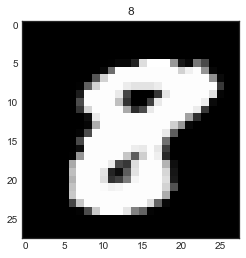

In [84]:
plt.title(label)
plt.imshow(image,"gray")#gray scale
plt.show()#이건 왜 하지?

## 각 Layer 설명

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [86]:
nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5,stride=1)


Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [87]:
layer = nn.Conv2d(1,20,5,1).to(torch.device("cpu"))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [88]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [89]:
weight = weight.detach()


In [90]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

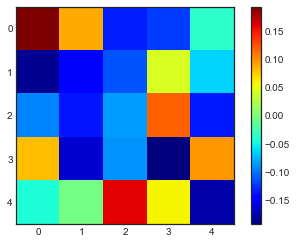

In [91]:
plt.imshow(weight[0,0,:,:],"jet")
plt.colorbar()
plt.show()

In [92]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [93]:
input_image = torch.unsqueeze(images[0],dim=0)
input_image.shape

torch.Size([1, 1, 28, 28])

In [94]:
output_data = layer(input_image)
output_data.shape

torch.Size([1, 20, 24, 24])

In [95]:
output = output_data.data
output.shape

torch.Size([1, 20, 24, 24])

In [96]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

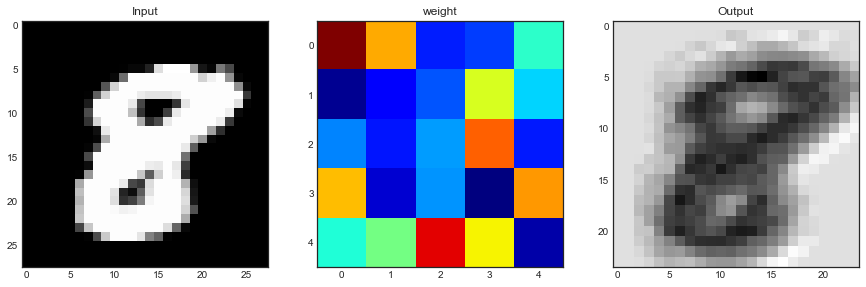

In [97]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image,"gray")

plt.subplot(132)
plt.title("weight")
plt.imshow(weight[0,0,:,:],"jet")

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:],"gray")

plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [98]:
image.shape

(28, 28)

In [99]:
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [100]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

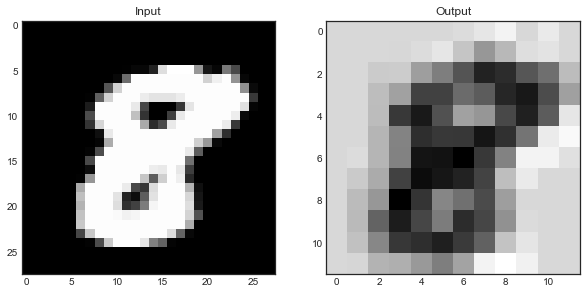

In [101]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title("Input")
plt.imshow(image,"gray")

plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0,0,:,:],"gray")

plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [102]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [103]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [104]:
lin = nn.Linear(784,10)(flatten)
lin.shape
# lin

torch.Size([1, 10])

In [105]:
lin

tensor([[-0.4205, -0.4834, -0.8466, -0.8341,  0.7867, -1.0900, -0.2769,  0.5565,
          0.1123, -0.1971]], grad_fn=<AddmmBackward0>)

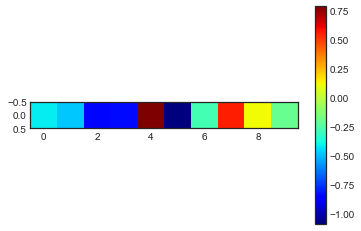

In [106]:
plt.imshow(lin.detach().numpy(),"jet")
plt.colorbar()
plt.show()

### Softmax

In [107]:
with torch.no_grad():
    flatten = image.view(1,28*28)
    lin = nn.Linear(28*28,10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [108]:
print(softmax)
print(softmax.numpy().shape)


tensor([[0.1155, 0.0158, 0.0897, 0.0567, 0.0460, 0.0576, 0.0527, 0.0633, 0.2690,
         0.2338]])
(1, 10)


In [109]:
import numpy as np

np.sum(softmax.numpy())


1.0000001

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [110]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [111]:
layer = nn.Conv2d(3,10,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 10, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

